In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir()


['MNIST data reduction - PCA.ipynb', 'train.csv', '.ipynb_checkpoints']

In [3]:
data=pd.read_csv('train.csv')

In [4]:
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
data.shape

(42000, 785)

In [6]:
l=data['label']
d=data.drop("label",axis=1)

In [7]:
print(d.shape)
l.shape

(42000, 784)


(42000,)

/Users/narasimhajwalapuram/Developer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


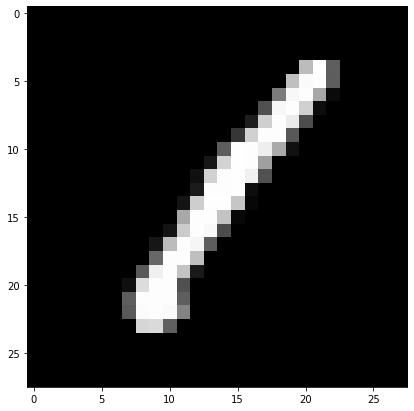

1


In [8]:
plt.figure(figsize=(7,7))
idx=0

grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,cmap="gray")
plt.show()

print(l[idx])


## Code to MNIST dataset

In [9]:
labels=l.head(15000)
dataa=d.head(15000)

print("The shape of sample data :",dataa.shape)

The shape of sample data : (15000, 784)


In [10]:
#Data preprocessing : Data standardisation 
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(dataa)
print("The shape of Column standardised data :",standardised_data.shape)

The shape of Column standardised data : (15000, 784)


In [11]:
#Computing covarience matrix using data i.e A^T * A
sample_data=standardised_data 

#Calculate co-varience matrix 
covar_matrix=np.matmul(sample_data.T,sample_data)
print("The shape of co-variance matrix : ",covar_matrix.shape)


The shape of co-variance matrix :  (784, 784)


In [12]:
#TO Project MNIST data to 2D we should find top two eigen values and their eigen vectors

from scipy.linalg import eigh
#by default eigh finds eigen vlues and vectors in ascending order
#but we need the maxmimun two values i.e last two values- "2"
#hence we use eigvals=(782,783) which mentions values should be between 782 and 783 

values,vectors=eigh(covar_matrix, eigvals=(782,783))
print("The shape of eigen vectors :",vectors.shape)

#Transpose it 
vectors=vectors.T
print("The shape of updated eigen vectors ",vectors.shape)

#Hence vectors[0] represents eigen vetor corresponding to first eigen value
#and vectors[1] represents eigen vector corresponding to second eigen value

The shape of eigen vectors : (784, 2)
The shape of updated eigen vectors  (2, 784)


In [13]:
#projecting original data sample on plane 
#formed by two eigen vectors  by vector - vector multiplication

new_coordinates=np.matmul(vectors,sample_data.T)
print("The shape of resulting new matrix : ",vectors.shape ," x ",sample_data.T.shape, " = ",new_coordinates.shape)

#Hence the resulting matrix new_coordinates contains co-ordinate values for every 15000 data points by vectors

The shape of resulting new matrix :  (2, 784)  x  (784, 15000)  =  (2, 15000)


In [14]:
print(new_coordinates)

[[-5.5586608   6.19363477 -1.90987794 ... -2.14793723  3.20412249
  -6.87896871]
 [-5.04355835 19.30527806 -7.67877525 ... -1.50726893 -6.53731291
  -1.25625388]]


In [15]:
# We should append or verticle stack labels along with data because we are going to plot 
new_coordinates=np.vstack((new_coordinates,labels)).T

#creating a new dataframe with data and labels 
dataframe=pd.DataFrame(data=new_coordinates,columns=('1st_principle','2nd_principle','label'))
print(dataframe.head())

   1st_principle  2nd_principle  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/Users/narasimhajwalapuram/Developer/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


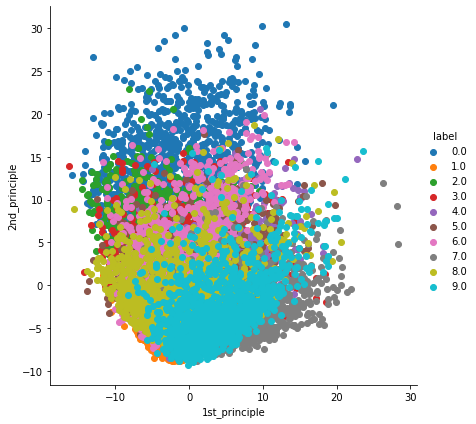

In [16]:
#plotting 2d data with seaborn 
import seaborn as sn
sn.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principle','2nd_principle').add_legend()
plt.show()

## PCA Using Sci-kit Learn

In [17]:
#inialise the function
from sklearn import decomposition
pca=decomposition.PCA()

In [18]:
#configuring the parameters
#the. number of components 
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

print("the shape of reduced data ",pca_data.shape)

the shape of reduced data  (15000, 2)


In [19]:
pca_data=np.vstack((pca_data.T,labels)).T

In [20]:
pca_df=pd.DataFrame(data=pca_data,columns=('1st_principle','2nd_principle','labels'))
print(pca_df.head())

   1st_principle  2nd_principle  labels
0      -5.043563      -5.558763     1.0
1      19.305371       6.194137     0.0
2      -7.678729      -1.909752     1.0
3      -0.464767       5.526491     4.0
4      26.644308       6.366729     0.0


/Users/narasimhajwalapuram/Developer/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


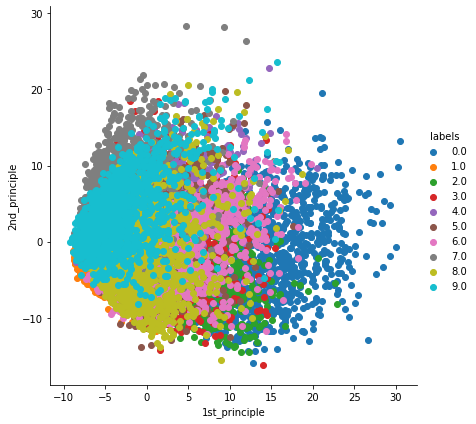

In [21]:
sn.FacetGrid(pca_df,hue='labels',size=6).map(plt.scatter,'1st_principle','2nd_principle').add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

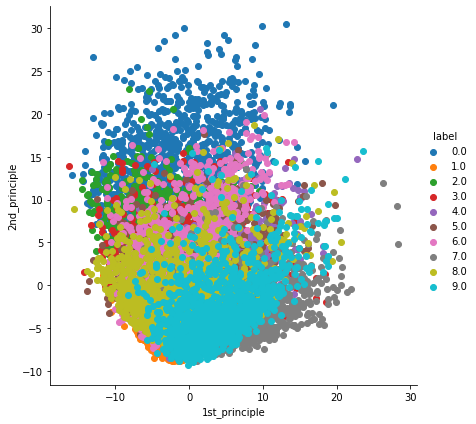

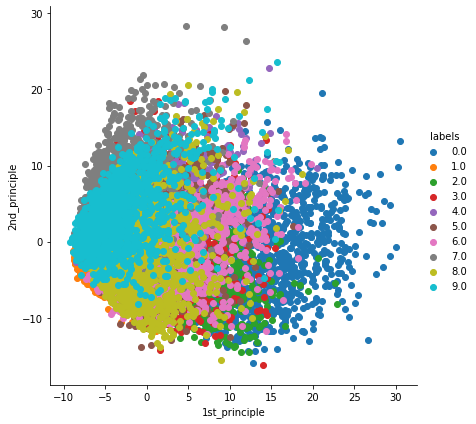

In [22]:
plt.figure(1)

sn.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principle','2nd_principle').add_legend()
plt.show()

sn.FacetGrid(pca_df,hue='labels',size=6).map(plt.scatter,'1st_principle','2nd_principle').add_legend()
plt.show()

## PCA For Dimensionality reduction (Not Visualisation)

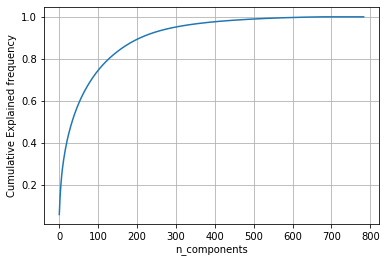

In [28]:
# TO find all the pca components 
pca.n_components=784
pca_data=pca.fit_transform(sample_data)

percentage_var_explained=pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

#Plot PCA Spectrum 
plt.figure(1,figsize=(6,4))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained frequency')
plt.show()